In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../data/processed/final.csv')

In [3]:
X = df.drop('Survived', axis=1)
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [4]:
logistic_model = LogisticRegression(max_iter=1000, random_state=42)
logistic_model.fit(X_train, y_train)

print("Model trained successfully!")
print("\nModel coefficients:")
for feature, coef in zip(X.columns, logistic_model.coef_[0]):
    print(f"{feature}: {coef:.4f}")
print(f"\nIntercept: {logistic_model.intercept_[0]:.4f}")

Model trained successfully!

Model coefficients:
Pclass: -1.0938
Sex: -2.4721
Age: -1.9678
Embarked_S: -0.6708
Embarked_C: -0.1826

Intercept: 4.7219


In [5]:
# Make predictions
y_train_pred = logistic_model.predict(X_train)
y_test_pred = logistic_model.predict(X_test)

# Get prediction probabilities
y_train_pred_proba = logistic_model.predict_proba(X_train)[:, 1]
y_test_pred_proba = logistic_model.predict_proba(X_test)[:, 1]

print("Predictions completed!")

Predictions completed!


In [6]:
# Evaluate model performance
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("=" * 50)
print("MODEL PERFORMANCE")
print("=" * 50)
print(f"\nTraining Accuracy: {train_accuracy:.4f} ({train_accuracy*100:.2f}%)")
print(f"Testing Accuracy: {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")

# ROC-AUC Score
train_roc_auc = roc_auc_score(y_train, y_train_pred_proba)
test_roc_auc = roc_auc_score(y_test, y_test_pred_proba)
print(f"\nTraining ROC-AUC Score: {train_roc_auc:.4f}")
print(f"Testing ROC-AUC Score: {test_roc_auc:.4f}")

MODEL PERFORMANCE

Training Accuracy: 0.7949 (79.49%)
Testing Accuracy: 0.7654 (76.54%)

Training ROC-AUC Score: 0.8551
Testing ROC-AUC Score: 0.8329



CONFUSION MATRIX - Test Set
[[91 19]
 [23 46]]


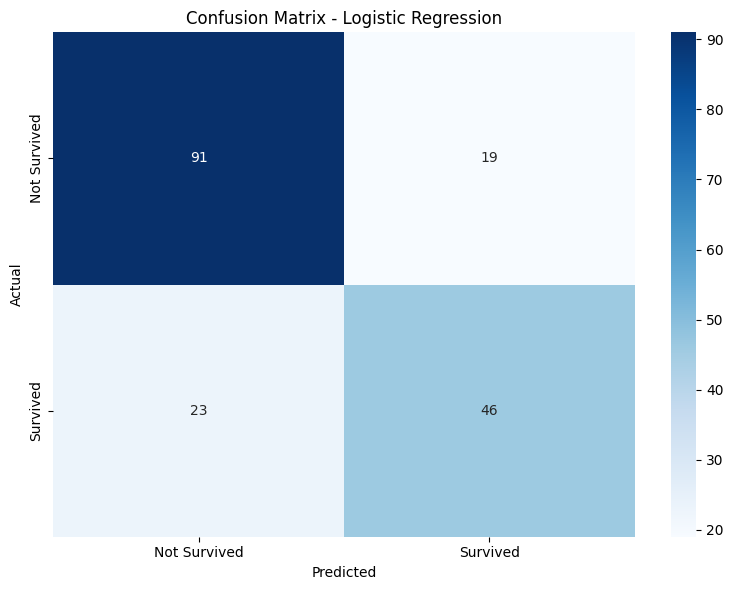

In [43]:
# Confusion Matrix
print("\n" + "=" * 50)
print("CONFUSION MATRIX - Test Set")
print("=" * 50)
cm = confusion_matrix(y_test, y_test_pred)
print(cm)

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Not Survived', 'Survived'],
            yticklabels=['Not Survived', 'Survived'])
plt.title('Confusion Matrix - Logistic Regression')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.tight_layout()
plt.show()

In [7]:
# Classification Report
print("\n" + "=" * 50)
print("CLASSIFICATION REPORT - Test Set")
print("=" * 50)
print(classification_report(y_test, y_test_pred, target_names=['Not Survived', 'Survived']))


CLASSIFICATION REPORT - Test Set
              precision    recall  f1-score   support

Not Survived       0.80      0.83      0.81       110
    Survived       0.71      0.67      0.69        69

    accuracy                           0.77       179
   macro avg       0.75      0.75      0.75       179
weighted avg       0.76      0.77      0.76       179




FEATURE IMPORTANCE
      Feature  Coefficient  Abs_Coefficient
1         Sex    -2.472087         2.472087
2         Age    -1.967831         1.967831
0      Pclass    -1.093755         1.093755
3  Embarked_S    -0.670849         0.670849
4  Embarked_C    -0.182608         0.182608


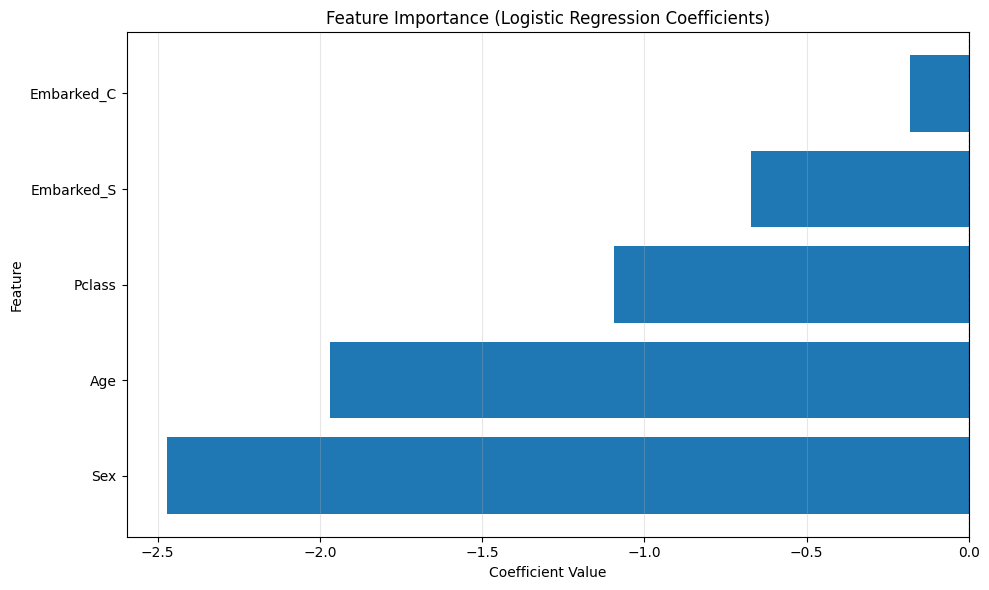

In [45]:
# Feature importance (absolute coefficient values)
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': logistic_model.coef_[0],
    'Abs_Coefficient': np.abs(logistic_model.coef_[0])
}).sort_values('Abs_Coefficient', ascending=False)

print("\n" + "=" * 50)
print("FEATURE IMPORTANCE")
print("=" * 50)
print(feature_importance)

# Visualize feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Coefficient'])
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Feature Importance (Logistic Regression Coefficients)')
plt.axvline(x=0, color='k', linestyle='--', linewidth=0.8)
plt.grid(alpha=0.3, axis='x')
plt.tight_layout()
plt.show()